***Importing Libraries for all packages and using 2 models for our model - Logistic Regression and  XGBOOST***

XGBOOST: XGBoost is an open-source software library that implements optimized distributed gradient boosting machine learning algorithms under the Gradient Boosting framework.

Logistic Regression: Logistic regression is a type of linear regression used for classification tasks, where the goal is to predict a binary or categorical outcome based on input features.

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import seaborn as sns
np.random.seed(0)


While exploring we came across the factor that plot_confusion_matrix class isn't supported anymore so we had to use ConfusionMatrixDisplay class.

In [177]:
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay 



**Loading Data**
By importing pandas Library use read_csv() funtion to load the csv file into pandas dataframe
head() function to display first 5 rows of the data frame

In [178]:
data = pd.read_csv("C:\\Users\\vaish\\git\\Group2_BDM1034_MidtermProjec\\weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**Understanding the data**

info() gives summary of the data
count() gives information on each column 

In [179]:
data.info()
data.count()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Date             145460
Location         145460
MinTemp          143975
MaxTemp          144199
Rainfall         142199
Evaporation       82670
Sunshine          75625
WindGustDir      135134
WindGustSpeed    135197
WindDir9am       134894
WindDir3pm       141232
WindSpeed9am     143693
WindSpeed3pm     142398
Humidity9am      142806
Humidity3pm      140953
Pressure9am      130395
Pressure3pm      130432
Cloud9am          89572
Cloud3pm          86102
Temp9am          143693
Temp3pm          141851
RainToday        142199
RainTomorrow     142193
dtype: int64

**Data Visualization and Cleaning**
These are the 2 important steps in data analysis
The countplot() function is used to show the count of observations in each category of a categorical variable.
The x parameter specifies the column to use for the x-axis of the countplot. 
The palette parameter specifies the color palette to be used for the plot.

<AxesSubplot: xlabel='RainTomorrow', ylabel='count'>

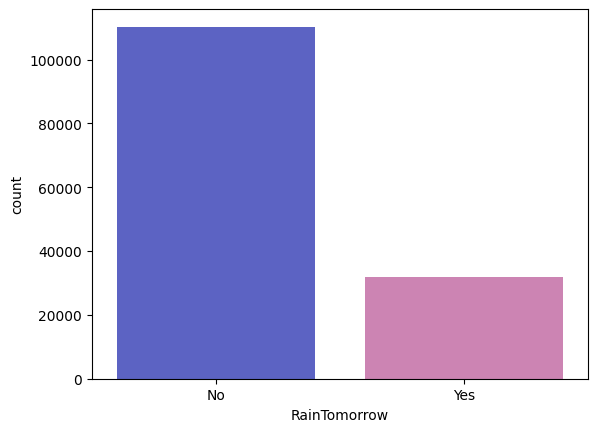

In [180]:
#to check whether data is balanced or imbalanced
cols= ["#4b54d4","#d878b7"]
sb.countplot(x= data["RainTomorrow"], palette= cols)


**creates a heatmap using the Seaborn library to visualize the correlation matrix.**
1. corr() method calculates correlation matrix for 'data'
2. diverging_Palette() -- for visualizing positive and negative correlations 260, -10 for start and end of the palette 
s, l, sep, n -- for saturation, lightness and Seperation and number of colors, center specifies the center color of the palatte 
3. fig size of 18 by 18 inches 
4.heatmap() - cmap is to use color map, annot values should be annoted, square each cell must be in square.

C:\Users\vaish\AppData\Local\Temp\ipykernel_20764\3051278654.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


<AxesSubplot: >

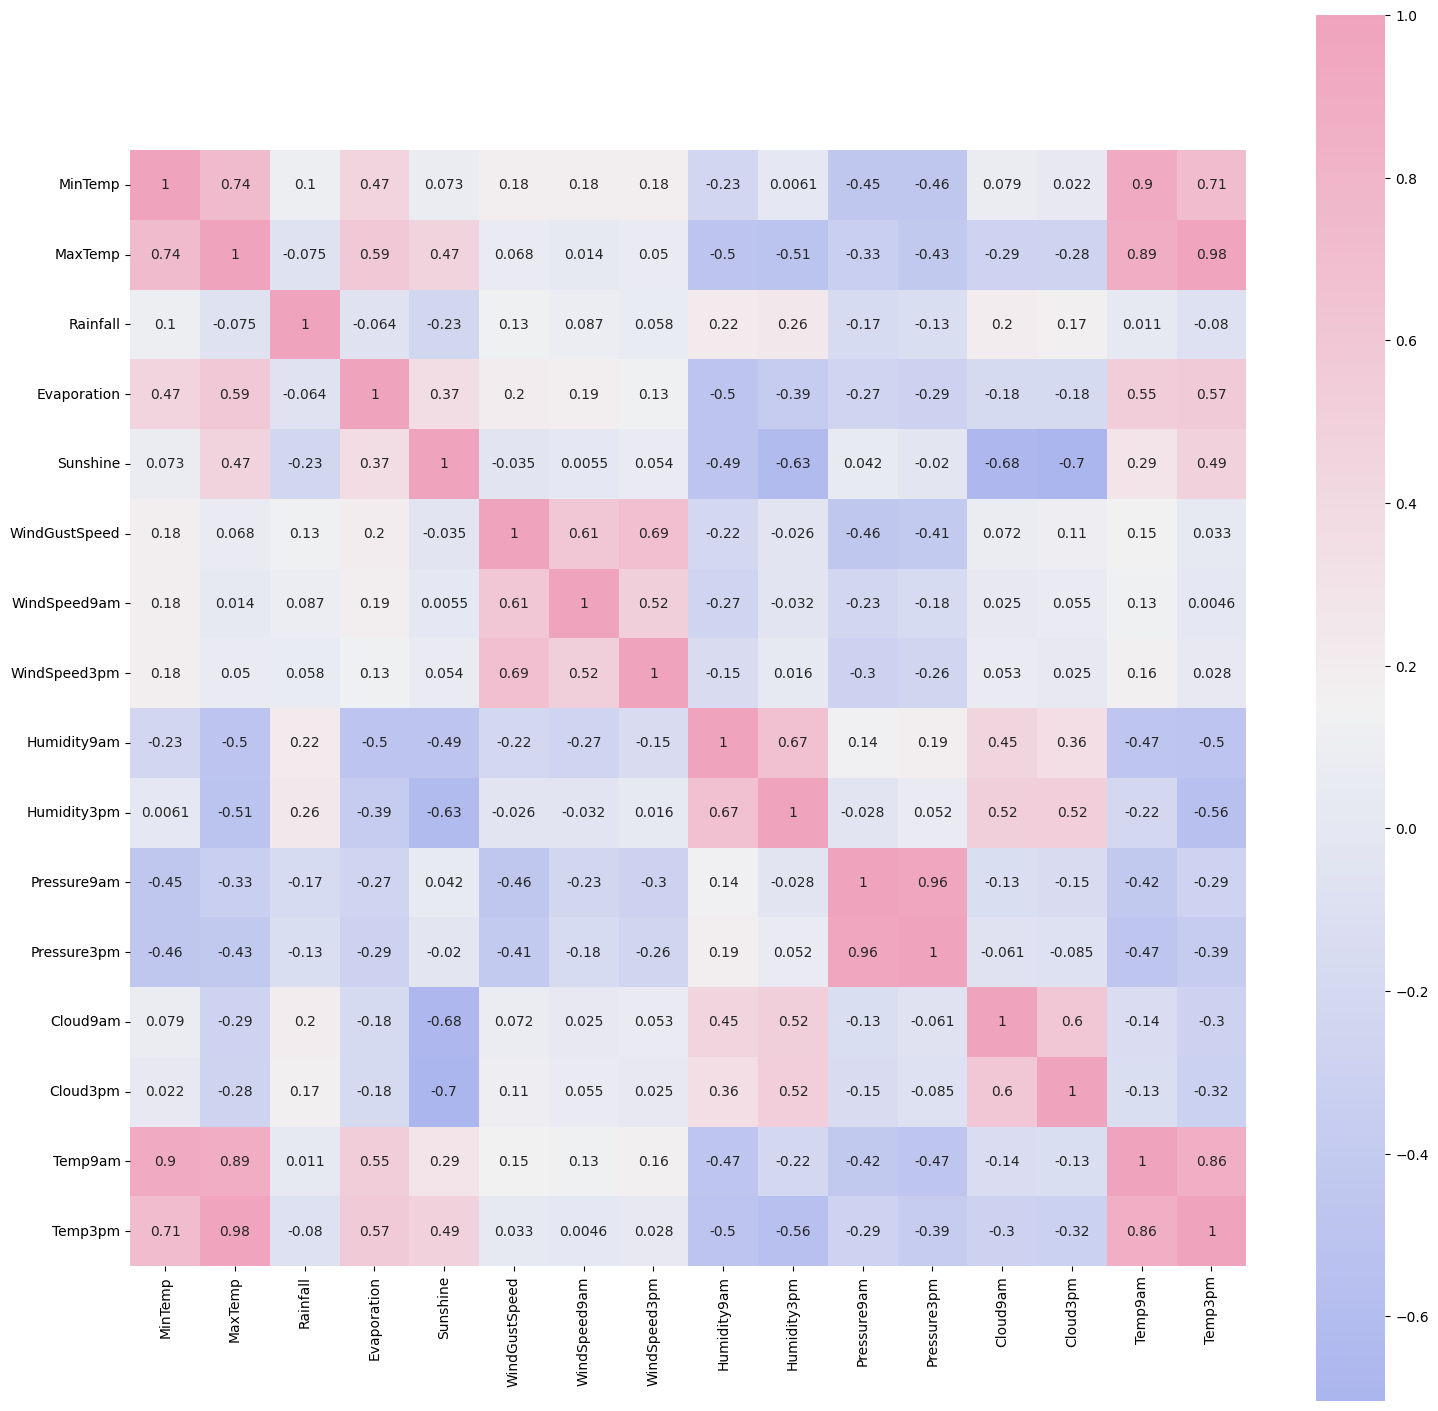

In [181]:
# Correlation amongst numeric attributes
corrmat = data.corr()
cmap = sb.diverging_palette(260,-10,s=75, l=75,sep=1, n=6,center='light', as_cmap=True)
plt.subplots(figsize=(18,18))
sb.heatmap(corrmat,cmap= cmap,annot=True, square=True)

**Parsing datetime** & **exploring the length of date objects**

In [182]:
lengths = data["Date"].str.len()
lengths.value_counts()

10    145460
Name: Date, dtype: int64

There don't seem to be any error in dates so parsing values into datetime & Creating a collumn of year

**Creating a new column for only year from date format**
1. Date column from data is converted to pandas datetime format by to_datetime()
2. created new coloumn for dataframe called 'year' it will extract each year from each row in date and result is assigned to year 

In [183]:

data['Date']= pd.to_datetime(data["Date"])
#Creating a collumn of year
data['year'] = data.Date.dt.year
data.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008


Below steps in the code are to fill the null values of different columns based on different data types 'object & float'

In dataframe 'data', dtype == "object" which identifies categorical columns, all the resulting index labels are then converted to a list() and given to object_cols.

In [184]:
# Get list of categorical variables
s = (data.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Missing values in categorical variables isnull().sum() -- it counts all the null values and summed up. 

In [185]:
for i in object_cols:
    print(i, data[i].isnull().sum())

Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


Filling the missing values using mode. 
THere are another different methods to fill up categorical values by forward fill (ffill) and backwardfill(bfill) it is not so successful it is not predicting the correct outputs. 

In [205]:
#Filling missing values with mode of the column in value. 
# for i in object_cols:
#     data[i].fillna(data[i].mode()[0], inplace=True)
for i in object_cols:
    data[i].fillna(data[i].ffill()[0], inplace=True)
print(object_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


The below code by specifying dtypes == "float64" will give the numeric datatype columns 

In [187]:
# Get list of neumeric variables
t = (data.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


finding out the missing values in numeric data columns

In [188]:
# Missing values in numeric variables

for i in num_cols:
    print(i, data[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609


In [189]:
# Filling missing values with median of the column in value

for i in num_cols:
    data[i].fillna(data[i].median(), inplace=True)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

Data PreProcessing

LabelEncoder is used to transform categorical data into numerical data so that it can be used as input for a machine learning algorithm.

In [190]:
label_encoder = LabelEncoder()
for i in object_cols:
    # data[i] = label_encoder.fit_transform(data[i])

# Check the data types of all columns in your DataFrame
# print(data.dtypes)
#print(data.columns)



  data[i] = data[i].astype(str)
  label_encoder = LabelEncoder()
  data[i] = label_encoder.fit_transform(data[i])
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  int32         
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  int32         
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  int32         
 10  WindDir3pm     145460 non-null  int32         
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

Observing the data to remove Bias from prediction by detecting Outliers and filtering those out

The StandardScaler object is a data preprocessing step that standardizes the features by scaling them to have a mean and a standard deviation.
This is a common step in many machine learning models, as it helps to improve the accuracy and performance of the model. 
Date and RainTomorrow are the scaled features which stored as features used as input data for the model.
Dropping out date and RainTomorrow and setting RainTomorrow as a target

In [191]:
features = data.drop(['Date', 'RainTomorrow'], axis=1)
target = data['RainTomorrow']
#Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names) 

features.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,145460.0,7.815677e-18,1.000003,-1.672228,-0.899139,0.014511,0.857881,1.701250
MinTemp,145460.0,-4.501830e-16,1.000003,-3.250525,-0.705659,-0.030170,0.723865,3.410112
MaxTemp,145460.0,3.001220e-16,1.000003,-3.952405,-0.735852,-0.086898,0.703133,3.510563
Rainfall,145460.0,7.815677e-18,1.000003,-0.275097,-0.275097,-0.275097,-0.203581,43.945571
Evaporation,145460.0,-3.282584e-17,1.000003,-1.629472,-0.371139,-0.119472,0.006361,43.985108
Sunshine,145460.0,-5.424080e-16,1.000003,-2.897217,0.076188,0.148710,0.257494,2.360634
WindGustDir,145460.0,6.252542e-18,1.000003,-1.724209,-0.872075,0.193094,1.045228,1.471296
WindGustSpeed,145460.0,1.824961e-16,1.000003,-2.588407,-0.683048,-0.073333,0.460168,7.243246
WindDir9am,145460.0,7.190423e-17,1.000003,-1.550000,-0.885669,0.000105,0.885879,1.771653
WindDir3pm,145460.0,8.284618e-17,1.000003,-1.718521,-0.837098,0.044324,0.925747,1.586813


Detecting outliers using boxplot 
Below we can see some ouliers which are spotted in boxplot.

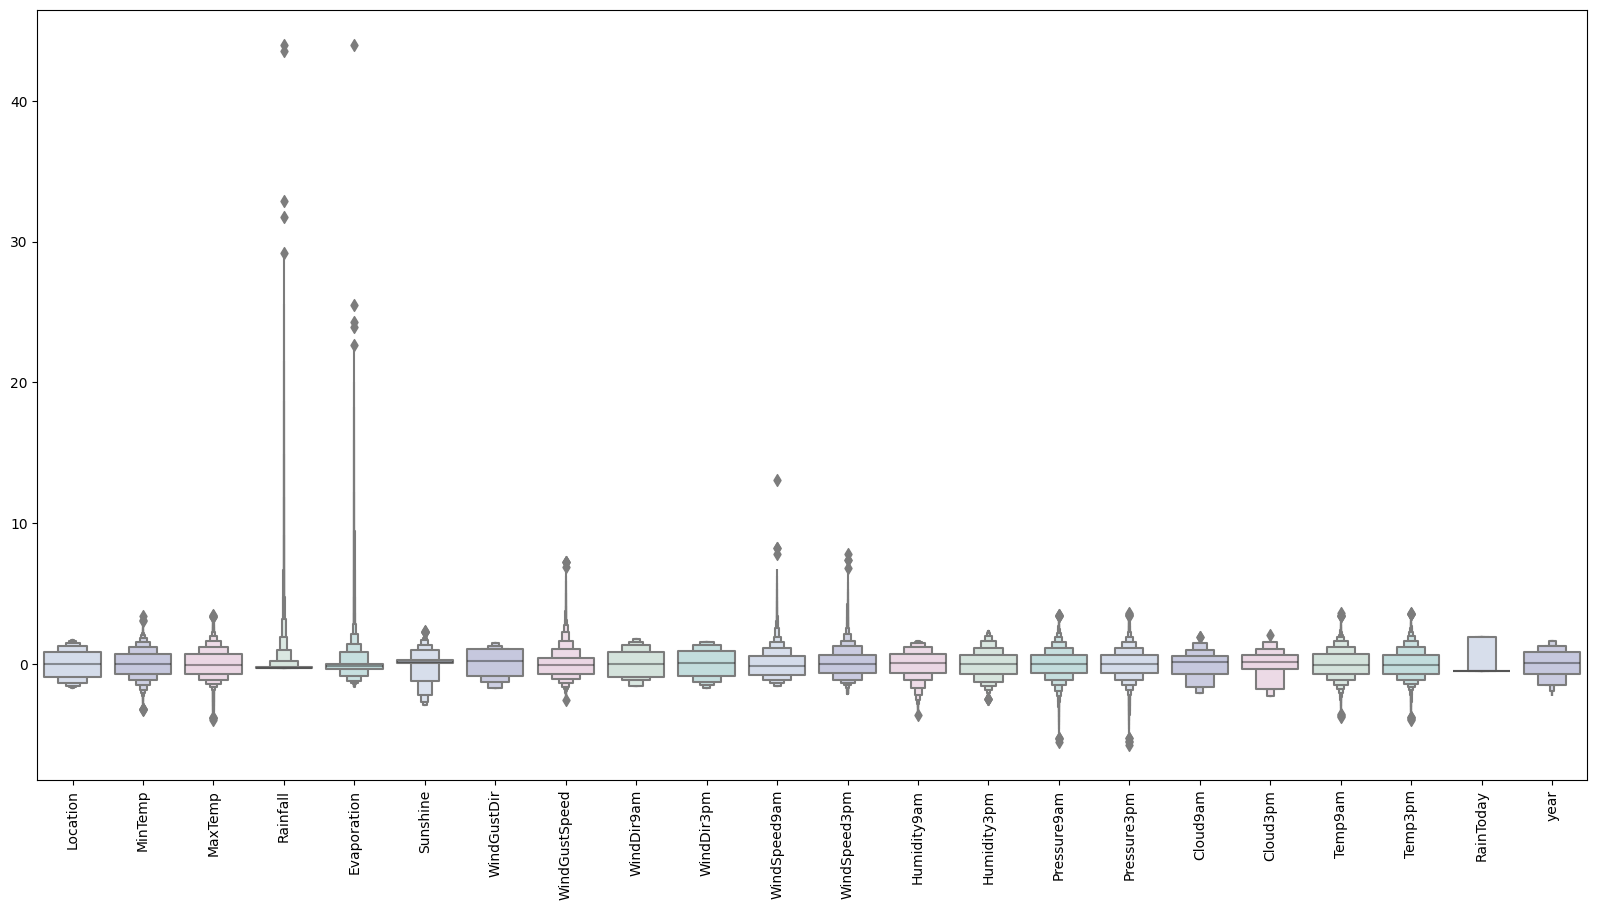

In [192]:
#Detecting outliers
#looking at the scaled features
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

Based on the above outliers featuring them and dropping out the outliers we want to predict RainTomorrow as the grain of our data would be date
RainTomorrow will be based on the other features too like MinTemp, MaxTemp.........

In [193]:
#full data for 
features["RainTomorrow"] = target

#Dropping with outlier

features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<4.5)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]>-2.2)]
features = features[(features["Pressure9am"]< 2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]< 2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]


features.shape

(127536, 23)

After dropping out all the outliers above we are ooking out for outiers in all the features 

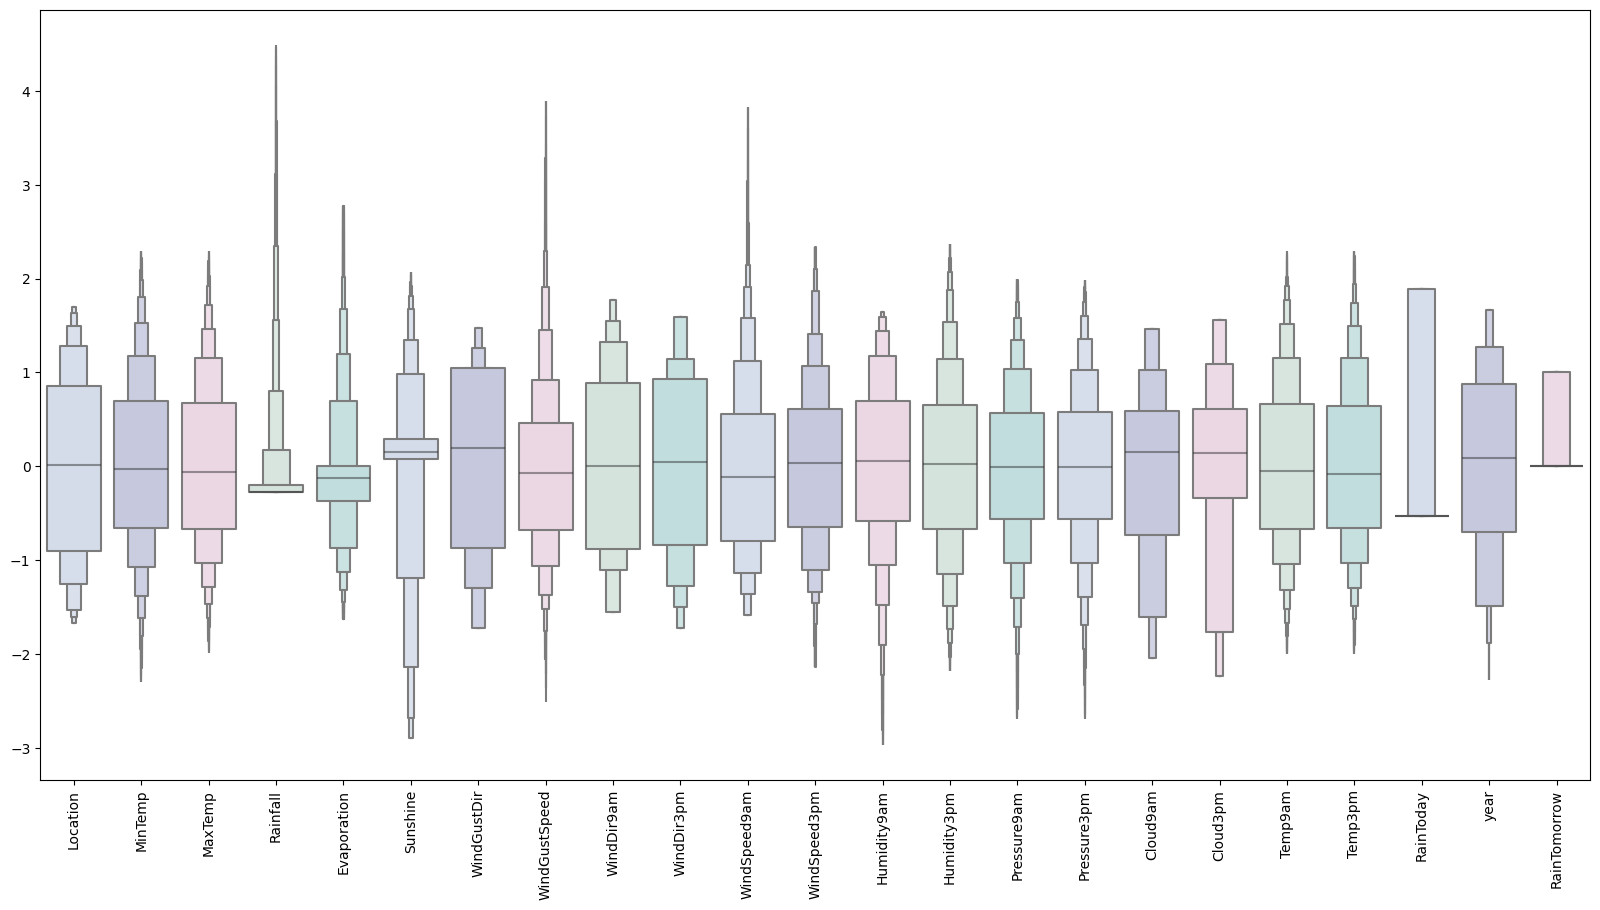

In [194]:
#looking at the scaled features without outliers

plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

The pie chart is have two sections, with the size of each section proportional to the number of occurrences of that value in the RainTomorrow column.


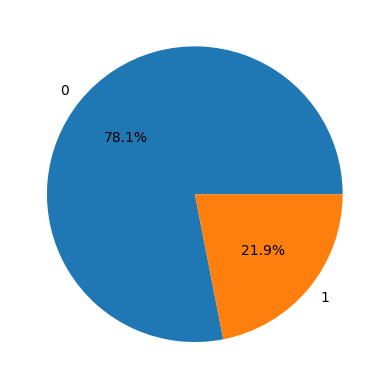

In [195]:
plt.pie(data['RainTomorrow'].value_counts().values,
		labels = data['RainTomorrow'].value_counts().index,
		autopct='%1.1f%%')
plt.show()

Getting the mean for all features for RainTomorrow  

In [196]:
data.groupby('RainTomorrow').mean()


C:\Users\vaish\AppData\Local\Temp\ipykernel_20764\913782513.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('RainTomorrow').mean()


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,year
RainTomorrow,,,,,,,,,,,,,,,,,,,,,
0,23.834967,11.914682,23.803728,1.268503,5.329166,8.456542,7.972311,38.431975,6.914978,7.729396,...,66.389909,46.855727,1018.467988,1015.998374,4.364553,4.385568,17.074182,22.350195,0.152162,2012.788762
1,23.645858,13.180375,21.121655,6.011852,4.647489,6.327129,8.525771,45.414594,7.300781,8.046334,...,77.849578,68.291966,1014.711497,1012.583945,5.711610,5.865608,16.676817,19.241406,0.457916,2012.702011


***to check distribution of continous features***

creates a grid of subplots showing the distribution of each feature in the data DataFrame.
This plot can be useful for visualizing the distribution of the features and identifying potential outliers or skewness in the data.
The x-axis of each subplot shows the range of values for the feature, and the y-axis shows the frequency of those values.

C:\Users\vaish\AppData\Local\Temp\ipykernel_20764\1184380658.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,6, i + 1)
C:\Users\vaish\AppData\Local\Temp\ipykernel_20764\1184380658.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])
C:\Users\vaish\AppData\Local\Temp\ipykernel_20764\1184380658.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or 

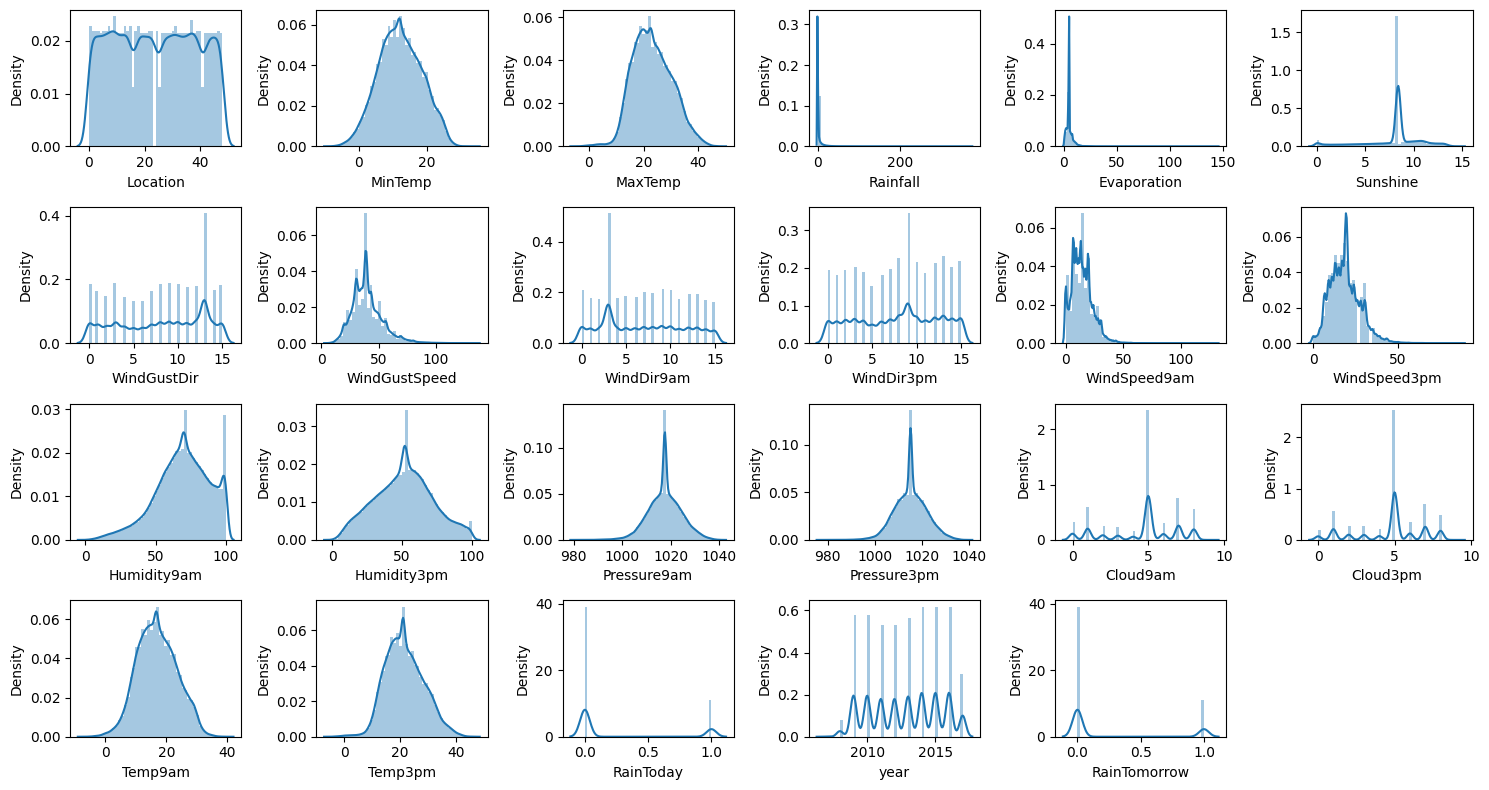

In [197]:

plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
    plt.subplot(4,6, i + 1)
    sb.distplot(data[col])
plt.tight_layout()
plt.show()


***to check correlation***

The values in the matrix range from -1 to 1, with values close to -1 indicating a strong negative correlation, values close to 1 indicating a strong positive correlation, and values close to 0 indicating no correlation. 
Blue represent pairs of features with a correlation coefficient greater than 0.8, indicating a strong positive correlation. 
The heatmap can be useful for identifying features that are highly correlated,

C:\Users\vaish\AppData\Local\Temp\ipykernel_20764\3550025265.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data.corr() > 0.8,


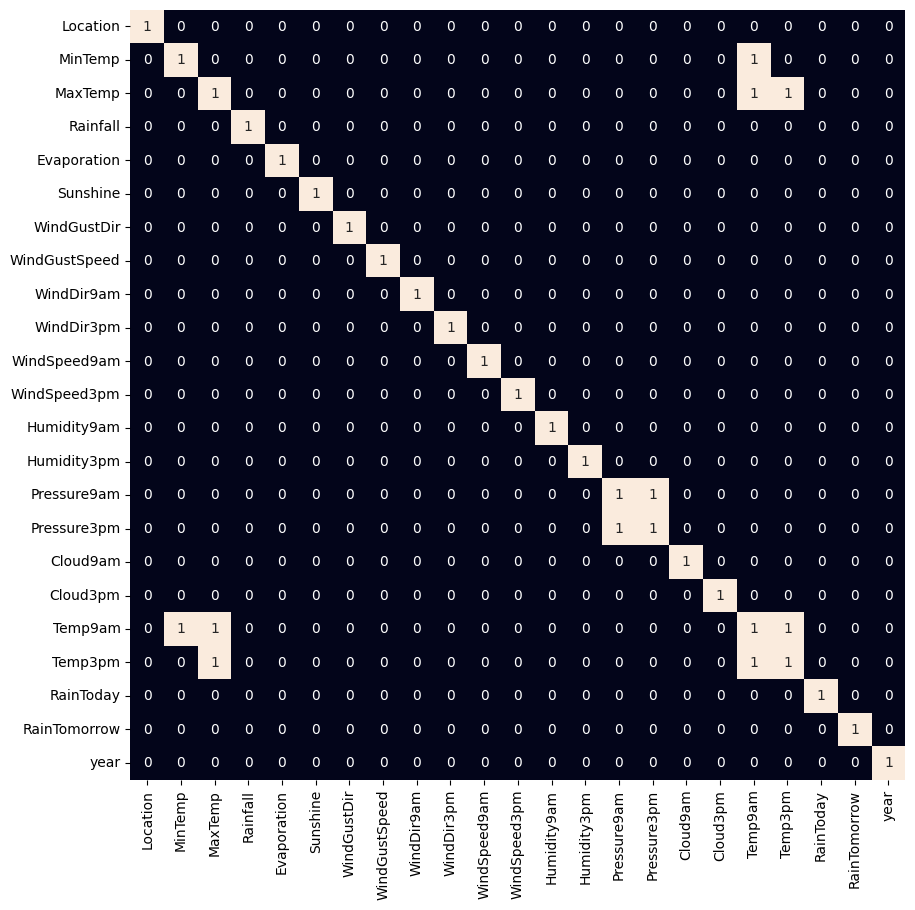

In [198]:

plt.figure(figsize=(10,10))
sb.heatmap(data.corr() > 0.8,
		annot=True,
		cbar=False)
plt.show()


Model Training


In [199]:
X = features.drop(["RainTomorrow"], axis=1)
y = features["RainTomorrow"]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(127536, 22)

In [200]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)
print(X)


[[-1.53978856  0.17653042 -0.06679027 ...  0.00408504 -0.52179343
  -1.87244929]
 [-1.53978856 -0.83773939  0.28121852 ...  0.41251249 -0.52179343
  -1.87244929]
 [-1.53978856  0.09200794  0.37613    ...  0.23280441 -0.52179343
  -1.87244929]
 ...
 [ 1.21214402 -1.17582933  0.56595297 ...  0.70658025 -0.52179343
   1.66995795]
 [ 1.21214402 -0.7701214   0.58177156 ...  0.69024315 -0.52179343
   1.66995795]
 [ 1.21214402  0.43009787 -0.11424601 ... -0.14294884 -0.52179343
   1.66995795]]


USING OUR 2 MODELS TO FIND THE ACCURACY

In [201]:

models = [LogisticRegression(), XGBClassifier()]#, SVC(kernel='rbf', probability=True)]
 
for i in range(2):
  models[i].fit(X, y)
 
  print(f'{models[i]} : ')
 
  train_preds = models[i].predict_proba(X)
  print('Training Accuracy : ', metrics.roc_auc_score(y, train_preds[:,1]))
 
  train_preds = models[i].predict_proba(X_test)
  print('Validation Accuracy : ', metrics.roc_auc_score(y_test, train_preds[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.856530340502487
Validation Accuracy :  0.8560085885539869

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accuracy :  0.925458938593841
Validation Accuracy :  0.9261341659406057



Model Evaluation by LOGISTICREGRESSION

normalized confusion matrix, where each cell represents the proportion of observations that were correctly or incorrectly classified by the logistic regression model. 

The diagonal cells represent the true positives and true negatives, and the off-diagonal cells represent the false positives and false negatives. 
The heatmap can be useful for visualizing the performance of the model and identifying any patterns in the errors.

[[19012  1098]
 [ 2876  2522]]


<AxesSubplot: >

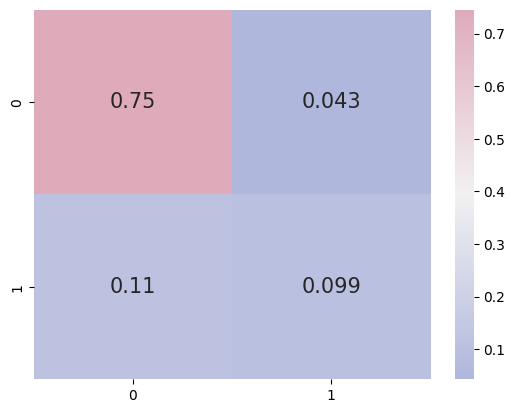

In [202]:
model = LogisticRegression()
model.fit(X,y)
y_pred = model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

#cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
#metrics.ConfusionMatrixDisplay(X, y_test)

cmap1 = sb.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
sb.heatmap(confusion_matrix/np.sum(confusion_matrix) , cmap = cmap1, annot = True, annot_kws = {'size':15})


Model Evaluation by XGBoost

The code fits an XGBoost model on the training data (X,y) and makes predictions on the test data (X_test) using the predict method.

[[19354   756]
 [ 2173  3225]]


<AxesSubplot: >

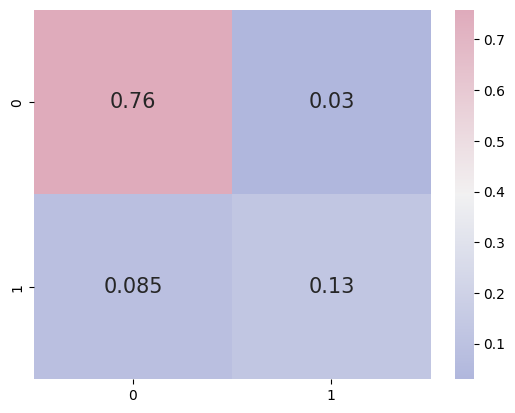

In [203]:
model = XGBClassifier()
model.fit(X,y)
y_pred = model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

#cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

#metrics.ConfusionMatrixDisplay(X, y_test)
cmap1 = sb.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
sb.heatmap(confusion_matrix/np.sum(confusion_matrix) , cmap = cmap1, annot = True, annot_kws = {'size':15})

Printing the precision Matrix , was trying to use streamlit to display the output but it only works on .py file , so had to skip

In [204]:

print(metrics.classification_report(y_test, models[1].predict(X_test)))


# with st.expander('CLASSIFICATION REPORT'):
#     c = metrics.classification_report(y_test, models[1].predict(X_test))
#     st.write(c)
#     #st.dataframe(words , 300 , 500)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     20110
           1       0.81      0.60      0.69      5398

    accuracy                           0.89     25508
   macro avg       0.85      0.78      0.81     25508
weighted avg       0.88      0.89      0.88     25508

